TARGET: nota ciencias da natureza (NU_NOTA_CN)

FUTEURE: 
Situação de conclusão do Ensino Médio (TP_ST_CONCLUSAO);
Tipo de escola do Ensino Médio (TP_ESCOLA);
Qual é a renda mensal de sua família (Q006);
Na sua residência tem acesso à Internet? (Q025); 
Incluindo você, quantas pessoas moram atualmente em sua residência? (Q005); 
Localização da Escola (TP_LOCALIZACAO_ESC)

# Projeto 3 - CDADOS

# Membros: 
Augusto Ricardo Ferreira, Matheus Pereira Belarmino 

# Introdução e mineração de dados


**Variável Alvo (Target):**

- Nota em Ciências da Natureza (NU_NOTA_CN)

**Variáveis Explicativas (Features)**

- Situação de Conclusão do Ensino Médio (TP_ST_CONCLUSAO)
- Tipo de Escola do Ensino Médio (TP_ESCOLA)
- Renda Mensal da Família (Q006)
- Acesso à Internet na Residência (Q025)
- Número de Pessoas na Residência (Q005)
- Localização da Escola (TP_LOCALIZACAO_ESC)




 As variáveis são classificadas em dois tipos principais: **features** e **target**. As **features** são as variáveis explicativas ou independentes, que ajudam a explicar ou prever a variável de interesse, enquanto o **target** é a variável dependente, que é o foco da nossa análise e previsão.

## Descrição das Variáveis

### Variável Alvo (Target):

- **NU_NOTA_CN (Nota em Ciências da Natureza)**
  - **Tipo:** Quantitativa 
  - **Descrição:** Nota obtida na prova de Ciências da Natureza

### Variáveis Explicativas (Features):

- **TP_ST_CONCLUSAO (Situação de Conclusão do Ensino Médio)**
  - **Tipo:** Qualitativa ordinal
  - **Descrição:** Status de conclusão do Ensino Médio

- **TP_ESCOLA (Tipo de Escola do Ensino Médio)**
  - **Tipo:** Qualitativa ordinal
  - **Descrição:** Tipo de escola (1: Pública, 2: Privada, etc.)

- **Q006 (Renda Mensal da Família)**
  - **Tipo:** Qualitativa ordinal
  - **Descrição:** Faixa de renda mensal familiar

- **Q025 (Acesso à Internet na Residência)**
  - **Tipo:** Qualitativa nominal
  - **Descrição:** Se há ou não acesso à internet na residência (A: Sim, B: Não)

- **TP_LOCALIZACAO_ESC (Localização da Escola)**
  - **Tipo:** Qualitativa nominal
  - **Descrição:** Localização da escola (1: Urbana, 2: Rural)

- **Q005 (Número de Pessoas na Residência)**
  - **Tipo:** Quantitativa discreta
  - **Descrição:** Quantas pessoas moram na residência


In [8]:
# carregando bibliotecas
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
print('Esperamos trabalhar no diretório')
print(os.getcwd())


Esperamos trabalhar no diretório
c:\Users\matheus\Desktop\projeto2_24\Projeto3


In [2]:
#dados = pd.read_csv('c:\zTodoresto\Insper\Projeto_3_Cdados\P3\MICRODADOS_ENEM_2023.csv', sep = ';', encoding='ISO-8859-1', chunksize=1000)
dados = pd.read_csv('C:/Users/matheus/Desktop/projeto2_24/microdados_enem_2023/DADOS/MICRODADOS_ENEM_2023.csv', sep = ';', encoding='ISO-8859-1', chunksize=1000)
dados = pd.concat(dados)

A partir dos dados originais, foi criado um novo dataframe com as colunas que nos interessam para a análise.

In [3]:
df_filtrado = dados[['NU_NOTA_CN','TP_ESCOLA','Q006','Q025','TP_LOCALIZACAO_ESC','Q005','TP_PRESENCA_CN']]
df_filtrado.columns

Index(['NU_NOTA_CN', 'TP_ESCOLA', 'Q006', 'Q025', 'TP_LOCALIZACAO_ESC', 'Q005',
       'TP_PRESENCA_CN'],
      dtype='object')

Aqui foi necessario filtrar o DataFrame para utilizar apenas os dados de alunos que compareceram.

In [4]:
df_filtrado = df_filtrado.loc[df_filtrado['TP_PRESENCA_CN'] == 1]



In [5]:
df_filtrado

,NU_NOTA_CN,TP_ESCOLA,Q006,Q025,TP_LOCALIZACAO_ESC,Q005,TP_PRESENCA_CN
2,502.0,1,C,B,NaN,5,1
3,459.0,2,C,B,1.0,5,1
4,402.5,2,B,A,1.0,4,1
9,564.7,1,F,B,NaN,2,1
10,644.9,1,B,B,NaN,4,1
...,...,...,...,...,...,...,...
3933946,568.6,1,D,B,NaN,3,1
3933948,476.2,2,F,B,1.0,4,1
3933950,566.2,1,F,B,NaN,5,1
3933951,377.2,1,F,B,NaN,4,1


Nesta etapa é essencial transformar variáveis qualitativas em categorias categóricas. Isso simplifica a interpretação dos dados e melhora a capacidade dos modelos de predição em compreendê-los de forma mais eficaz.

In [12]:
# Converter as variáveis qualitativas para categóricas
df_filtrado['TP_ESCOLA'] = df_filtrado['TP_ESCOLA'].astype('category')
df_filtrado['Q006'] = df_filtrado['Q006'].astype('category')
df_filtrado['Q025'] = df_filtrado['Q025'].astype('category')
df_filtrado['TP_LOCALIZACAO_ESC'] = df_filtrado['TP_LOCALIZACAO_ESC'].astype('category')


In [13]:
df_filtrado['NU_NOTA_CN'].describe()

count    2.692427e+06
mean     4.957515e+02
std      8.792872e+01
min      0.000000e+00
25%      4.405000e+02
50%      4.939000e+02
75%      5.512000e+02
max      8.684000e+02
Name: NU_NOTA_CN, dtype: float64

A função .describe fornece diversas informações detalhadas sobre as notas de Ciências da Natureza, permitindo uma análise abrangente dos dados:

- Contagem: 2.692.427 estudantes participaram.
- Média: A nota média foi de 495,75.
- Desvio Padrão: O desvio padrão é de aproximadamente 879,08, indicando uma grande variação nas notas.
- Mínimo: A nota mínima registrada é 0, o que pode indicar que alguns alunos faltaram ou zeraram a prova.
- 1º Quartil (25%): 25% dos estudantes tiveram notas abaixo de 440.
- Mediana (50%): A nota mediana é 493, o que significa que metade dos estudantes tirou menos que isso e a outra metade mais.
- 3º Quartil (75%): 75% dos estudantes tiveram notas abaixo de 551.
- Máximo: A nota máxima foi 869,4.

Esses dados permitem uma compreensão detalhada da distribuição das notas e ajudam a identificar padrões e variações de desempenho entre os estudantes.

# Análise da distribuição de notas de Ciências da Natureza 

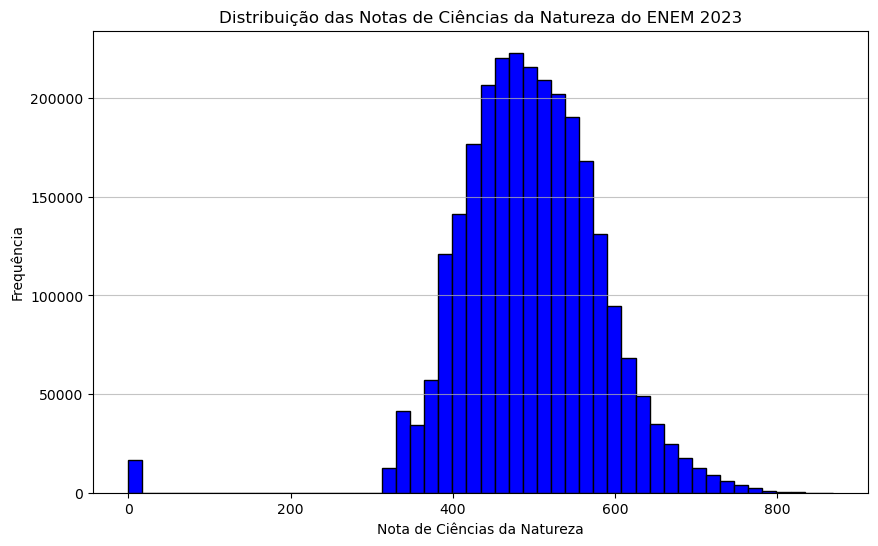

In [22]:

plt.figure(figsize=(10, 6))
plt.hist(df_filtrado['NU_NOTA_CN'], bins=50, color='blue', edgecolor='black')
plt.title('Distribuição das Notas de Ciências da Natureza do ENEM 2023')
plt.xlabel('Nota de Ciências da Natureza')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Distribuição das Notas:**

- A maior concentração de notas está na faixa de 400 a 600 pontos.
- A distribuição das notas parece ter uma forma aproximadamente normal, com uma leve assimetria à esquerda.

**Outliers e Notas Baixas:**

- Há um pico significativo em torno de 0 pontos, indicando que muitos alunos obtiveram uma nota extremamente baixa ou nula.
- Este pico pode ser causado por alunos que não responderam à prova, responderam incorretamente ou outras razões específicas para notas nulas.

**Notas Altas:**

- A frequência de notas acima de 700 pontos é muito baixa, indicando que poucos alunos alcançam notas muito altas em Ciências da Natureza.

**Frequência:**

- A maioria dos alunos obteve notas entre 400 e 600 pontos, com o pico mais alto de frequência próximo de 500 pontos.


## Análise da Variável Alvo (NU_NOTA_CN) vs. TP_ESCOLA


C:\Users\matheus\AppData\Local\Temp\ipykernel_17740\3980037041.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df_filtrado['TP_ESCOLA'].cat.rename_categories({1: 'Não Respondeu', 2: 'Escola Pública', 3: 'Escola Privada'}, inplace=True)


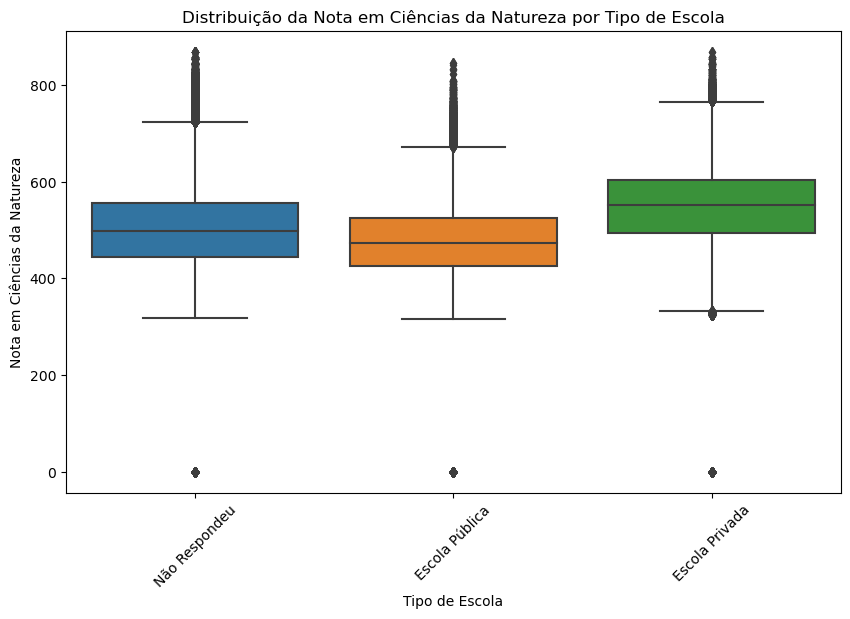

In [ ]:
# Renomear as categorias de TP_ESCOLA
df_filtrado['TP_ESCOLA'].cat.rename_categories({1: 'Não Respondeu', 2: 'Escola Pública', 3: 'Escola Privada'}, inplace=True)

# Gráfico de boxplot para analisar a distribuição das notas em CN por tipo de escola
plt.figure(figsize=(10, 6))
sns.boxplot(x='TP_ESCOLA', y='NU_NOTA_CN', data=df_filtrado)
plt.title('Distribuição da Nota em Ciências da Natureza por Tipo de Escola')
plt.xlabel('Tipo de Escola')
plt.ylabel('Nota em Ciências da Natureza')
plt.show()

**Interpretação**

**Distribuição das Notas por Tipo de Escola:**

- **Tipo de Escola 1:** Tem uma mediana mais alta comparada com o Tipo de Escola 2, e possui uma maior variação de notas.
- **Tipo de Escola 2:** Apresenta a menor mediana e uma distribuição mais concentrada em notas mais baixas.
- **Tipo de Escola 3:** Tem a maior mediana, indicando que os alunos desse tipo de escola tendem a ter notas mais altas em Ciências da Natureza.

**Dispersão das Notas:**

Todas as categorias de escola apresentam outliers, com alguns alunos obtendo notas excepcionalmente altas ou baixas.


## como o número de pessoas na residência (Q005) influencia as notas em Ciências da Natureza (NU_NOTA_CN).